This program is to look for fraud in presidentail elections 1976 to 2020

Import libraries

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load and read dataset

File was taken from the following sites and apended:-
present taken from:- https://www.kaggle.com/unanimad/us-election-2020?select=president_county_candidate.csv
past taken from:- https://electionlab.mit.edu/data

1:democrat, 2:republican, 3:other

In [175]:
train=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/US-presidential-elections-2020/main/series.csv")
train

,state,candidate,party,year,candidatevotes
0,Alabama,"Carter, Jimmy",1.0,1976,659170
1,Alabama,"Ford, Gerald",2.0,1976,504070
2,Alabama,"Maddox, Lester",3.0,1976,9198
3,Alabama,"Bubar, Benjamin """"Ben""""",3.0,1976,6669
4,Alabama,"Hall, Gus",3.0,1976,1954
...,...,...,...,...,...
4086,Wyoming,Write-ins,3.0,2020,1739
4087,Wyoming,Brock Pierce,3.0,2020,2208
4088,Wyoming,Donald Trump,2.0,2020,193559
4089,Wyoming,Jo Jorgensen,3.0,2020,5768


Check for null values

In [176]:
train.isnull().sum()

state             0
candidate         0
party             0
year              0
candidatevotes    0
dtype: int64

Graphical representation of votes

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


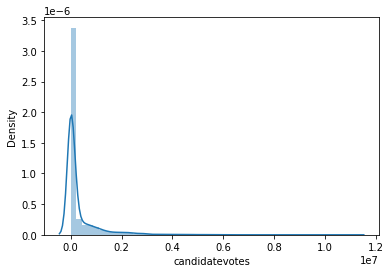

In [177]:
sns.distplot(train.candidatevotes)

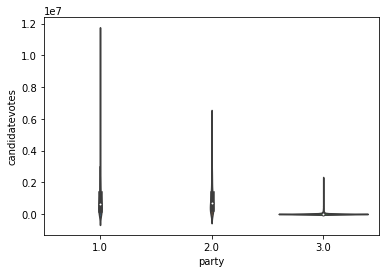

In [178]:
ax = sns.violinplot(x="party", y="candidatevotes", data=train)

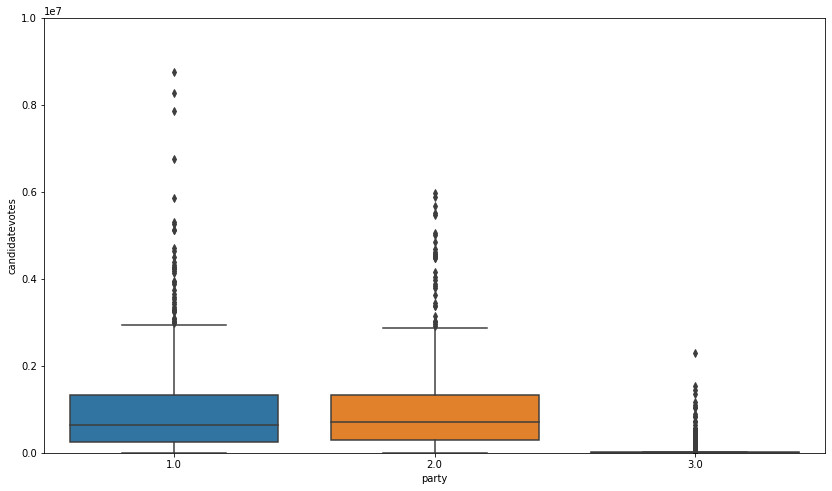

In [179]:
var = 'party'
data = pd.concat([train['candidatevotes'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="candidatevotes", data=data)
fig.axis(ymin=0, ymax=10000000);

Define model

In [180]:
from sklearn.ensemble import IsolationForest

model=IsolationForest(n_estimators=1000, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(train[['candidatevotes']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=1000,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [181]:
train['scores']=model.decision_function(train[['candidatevotes']])
train['anomaly']=model.predict(train[['candidatevotes']])
train

,state,candidate,party,year,candidatevotes,scores,anomaly
0,Alabama,"Carter, Jimmy",1.0,1976,659170,0.018801,1
1,Alabama,"Ford, Gerald",2.0,1976,504070,0.012368,1
2,Alabama,"Maddox, Lester",3.0,1976,9198,0.167402,1
3,Alabama,"Bubar, Benjamin """"Ben""""",3.0,1976,6669,0.176984,1
4,Alabama,"Hall, Gus",3.0,1976,1954,0.199253,1
...,...,...,...,...,...,...,...
4086,Wyoming,Write-ins,3.0,2020,1739,0.199390,1
4087,Wyoming,Brock Pierce,3.0,2020,2208,0.199778,1
4088,Wyoming,Donald Trump,2.0,2020,193559,0.052664,1
4089,Wyoming,Jo Jorgensen,3.0,2020,5768,0.182180,1


In [182]:
anomaly=train.loc[train['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

           state      candidate  party  year  candidatevotes    scores  anomaly
23    California   Ford, Gerald    2.0  1976         3882244 -0.197996       -1
24    California  Carter, Jimmy    1.0  1976         3742284 -0.192749       -1
55       Florida  Carter, Jimmy    1.0  1976         1636000 -0.059298       -1
56       Florida   Ford, Gerald    2.0  1976         1469531 -0.051138       -1
70      Illinois   Ford, Gerald    2.0  1976         2364269 -0.088208       -1
...          ...            ...    ...   ...             ...       ...      ...
4067    Virginia      Joe Biden    1.0  2020         2413568 -0.096538       -1
4070  Washington   Donald Trump    2.0  2020         1584588 -0.059585       -1
4074  Washington      Joe Biden    1.0  2020         2369437 -0.088967       -1
4083   Wisconsin   Donald Trump    2.0  2020         1610151 -0.058759       -1
4085   Wisconsin      Joe Biden    1.0  2020         1630716 -0.059288       -1

[409 rows x 7 columns]


In [183]:
outliers_counter = len(train[train['candidatevotes'] > 999999])
outliers_counter

442

In [184]:
outliers_year = anomaly.groupby(['state','candidate','year', 'party'])['candidatevotes'].sum().reset_index()
outliers_year

,state,candidate,year,party,candidatevotes
0,Alabama,"Bush, George W.",2004,2.0,1176394
1,Alabama,Donald Trump,2020,2.0,1441170
2,Alabama,"McCain, John",2008,2.0,1266546
3,Alabama,"Romney, Mitt",2012,2.0,1255925
4,Alabama,"Trump, Donald J.",2016,2.0,1318255
...,...,...,...,...,...
404,Wisconsin,"Obama, Barack H.",2012,1.0,1620985
405,Wisconsin,"Reagan, Ronald",1980,2.0,1088845
406,Wisconsin,"Reagan, Ronald",1984,2.0,1198584
407,Wisconsin,"Romney, Mitt",2012,2.0,1410966


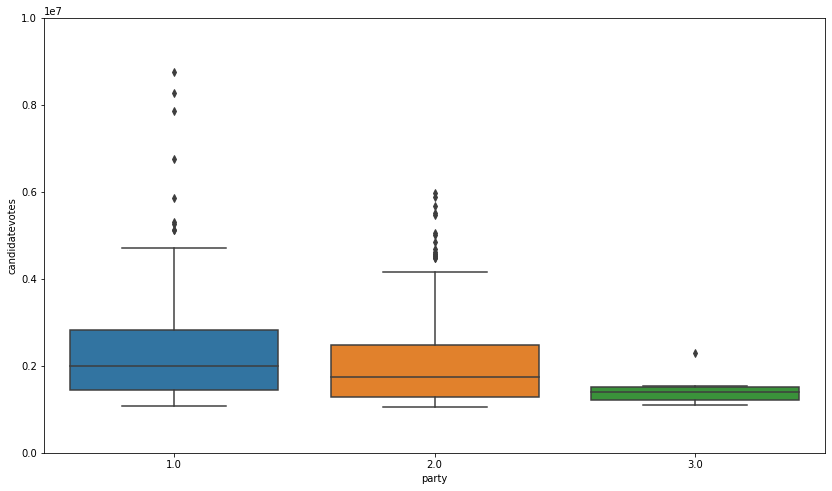

In [185]:
var = 'party'
data = pd.concat([outliers_year['candidatevotes'], outliers_year[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="candidatevotes", data=data)
fig.axis(ymin=0, ymax=10000000);

In [186]:
out_08 = outliers_year.loc[outliers_year['year'] == 2008]

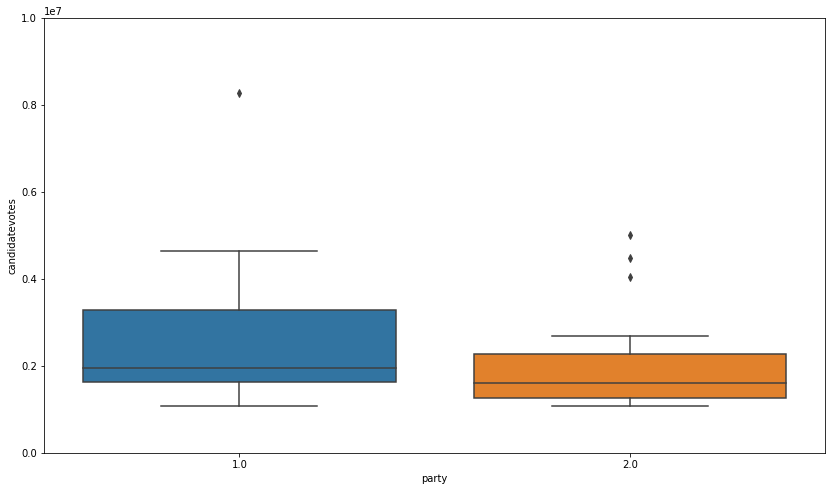

In [187]:
var = 'party'
data = pd.concat([out_08['candidatevotes'], out_08[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="candidatevotes", data=data)
fig.axis(ymin=0, ymax=10000000);

In [188]:
out_12 = outliers_year.loc[outliers_year['year'] == 2012]

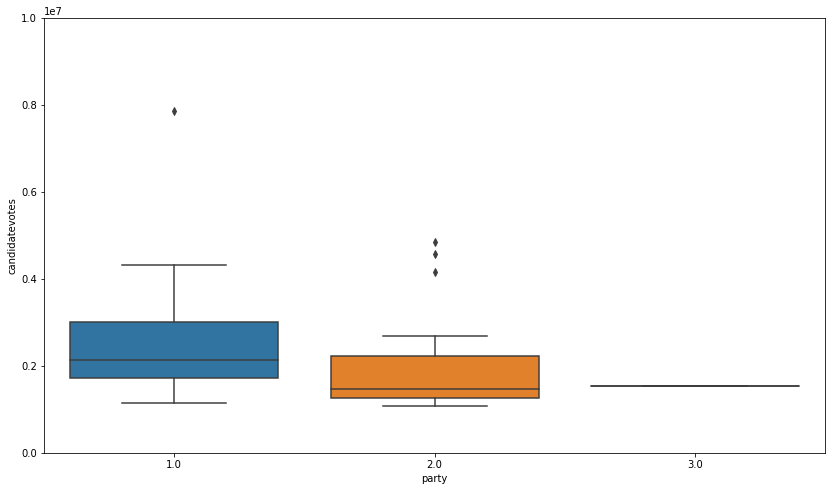

In [189]:
var = 'party'
data = pd.concat([out_12['candidatevotes'], out_12[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="candidatevotes", data=data)
fig.axis(ymin=0, ymax=10000000);

In [190]:
out_16 = outliers_year.loc[outliers_year['year'] == 2016]
out_16

,state,candidate,year,party,candidatevotes
4,Alabama,"Trump, Donald J.",2016,2.0,1318255
6,Arizona,"Clinton, Hillary",2016,1.0,1161167
11,Arizona,"Trump, Donald J.",2016,2.0,1252401
20,California,"Clinton, Hillary",2016,1.0,8753788
36,California,"Trump, Donald J.",2016,2.0,4483810
38,Colorado,"Clinton, Hillary",2016,1.0,1338870
45,Colorado,"Trump, Donald J.",2016,2.0,1202484
55,Florida,"Clinton, Hillary",2016,1.0,4504975
70,Florida,"Trump, Donald J.",2016,2.0,4617886
74,Georgia,"Clinton, Hillary",2016,1.0,1877963


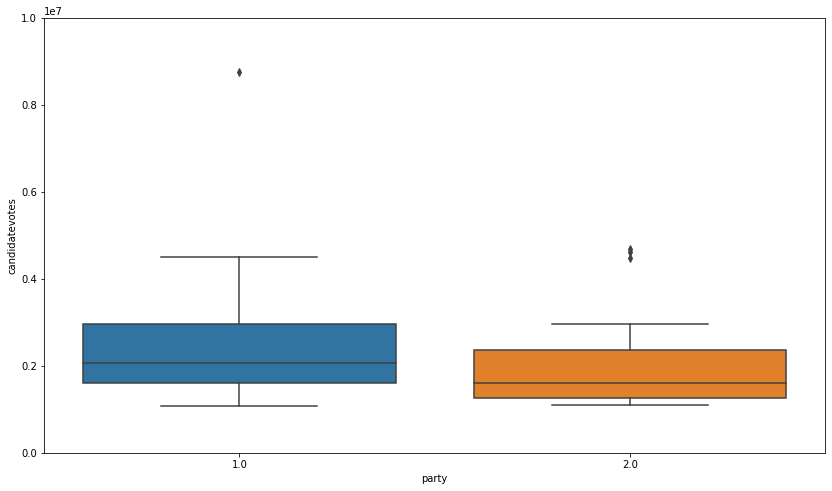

In [191]:
var = 'party'
data = pd.concat([out_16['candidatevotes'], out_16[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="candidatevotes", data=data)
fig.axis(ymin=0, ymax=10000000);

In [192]:
out_20 = outliers_year.loc[outliers_year['year'] == 2020]
out_20

,state,candidate,year,party,candidatevotes
1,Alabama,Donald Trump,2020,2.0,1441170
7,Arizona,Donald Trump,2020,2.0,1661686
8,Arizona,Joe Biden,2020,1.0,1672143
22,California,Donald Trump,2020,2.0,5982194
26,California,Joe Biden,2020,1.0,11082293
39,Colorado,Donald Trump,2020,2.0,1364471
40,Colorado,Joe Biden,2020,1.0,1804196
46,Connecticut,Joe Biden,2020,1.0,1080680
57,Florida,Donald Trump,2020,2.0,5668731
61,Florida,Joe Biden,2020,1.0,5297045


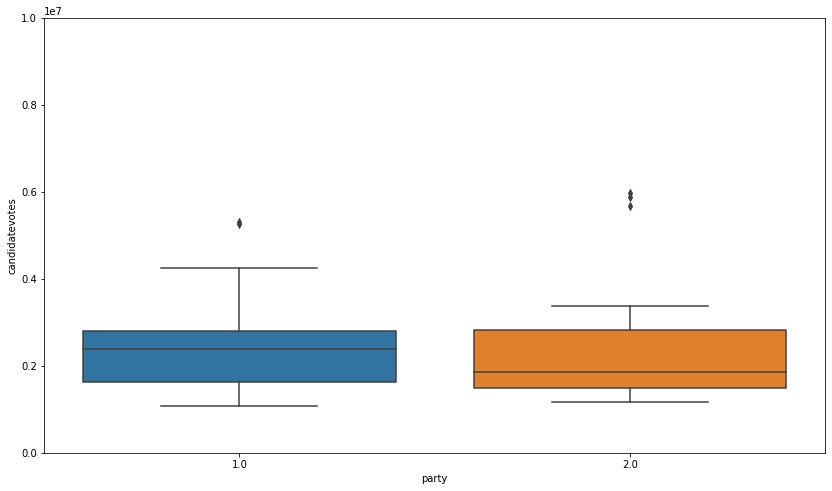

In [193]:
var = 'party'
data = pd.concat([out_20['candidatevotes'], out_20[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="candidatevotes", data=data)
fig.axis(ymin=0, ymax=10000000);

In [194]:
print("Accuracy percentage:", 100*list(train['anomaly']).count(-1)/(outliers_counter))

Accuracy percentage: 92.53393665158372
